## Digit Recognizer

[View Project on Kaggle](https://www.kaggle.com/c/digit-recognizer)

[View Details on Medium](https://medium.com/@ryan.han)

### Import Tools

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Load Training and Testing Data

In [2]:
data_dir = './'

def load_data(data_dir, rows=42000):
    train = pd.read_csv(data_dir + 'train.csv')
    train_value = train.values[0:rows,1:]
    train_label = train.values[0:rows,0] 
    test = pd.read_csv(data_dir + 'test.csv').values 
    return train_value, train_label, train, test

train_value, train_label, train, test = load_data(data_dir)

FileNotFoundError: File b'./train.csv' does not exist

### View Data

In [3]:
print(train.head())

NameError: name 'train' is not defined

In [4]:
print(train.info())

NameError: name 'train' is not defined

In [5]:
print(train.shape)

NameError: name 'train' is not defined

### Data Visualization

In [6]:
import matplotlib
import matplotlib.pyplot as plt

def visualize_data(row):
    print('The image on row ' + str(row) + ' is ' + str(train_label[row]))
    plt.imshow(train_value[row].reshape((28, 28)))
    plt.show()

visualize_data(20)

NameError: name 'train_label' is not defined

### Display Some Data

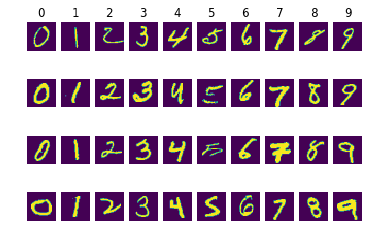

In [5]:
def display_data(rows):
    for label, cls in enumerate(range(10)):
        indices = np.nonzero([i == label for i in train_label])
        indices = np.random.choice(indices[0], rows)
        for i, index in enumerate(indices):
            plt_index = i * 10 + label + 1 
            plt.subplot(rows, 10, plt_index)
            plt.imshow(train_value[index].reshape(28, 28))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()  
    
display_data(4)

### Split Data into Train and Test 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_value,
                                                   train_label,
                                                   test_size = 0.2,
                                                   random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


### Implement KNN Algorithm

In [7]:
from sklearn.metrics import accuracy_score

class knn():
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X, num, k=3):
        data = X_train
        label = y_train

        data_size = data.shape[0]
        diff_matrix = np.tile(X,(data_size, 1)) - data
        sq_matrix = diff_matrix**2
        sum_matrix = sq_matrix.sum(axis=1)
        distances = sum_matrix**0.5
        sorted_distances = distances.argsort()
        class_count = {}
        
        for i in range(k):
            vote = label[sorted_distances[i]]
            class_count[vote] = class_count.get(vote,0) + 1
        max = 0
        ans = 0
        for k, v in class_count.items():
            if(v > max):
                ans = k
                max = v
        return(ans)

### Classifier

In [ ]:
classifier = knn()
classifier.train(X_train, y_train)

### Validation

In [ ]:
def validation(k):
    max = 0
    ans_k = 0

    for k in range(1, k):
        print ('when k = ' + str(k) + ', start training')
        predictions = np.zeros(len(y_test))
    
        for i in range(X_test.shape[0]):
            if i % 500 == 0:
                print("Computing  " + str(i+1) + "/" + str(int(len(X_test))) + "...")
            output = classifier.predict(X_test[i], i, k)
            predictions[i] = output
    
        accuracy = accuracy_score(y_test, predictions)
        print ('k = '+ str(k) , ' accuracy =' + str(accuracy))
        if max < accuracy:
            ans_k = k
            max = accuracy
    print(ans_k)
    print(max)

validation(20)

when k = 1, start training
Computing  1/8400...


### Predict

In [ ]:
def predict(k):
    predictions = np.zeros(test.shape[0])
    for i in range(test.shape[0]):
        if i % 500 ==0:
            print("Computing  " + str(i+1) + "/" + str(int(len(test))) + "...")
        predictions[i] = classifier.predict(test[i], i, k)
    return predictions
        
predictions = predict(4)

### Check

In [ ]:
print (predictions[300])
plt.imshow(test[300].reshape((28, 28)))
plt.show()

### Save Results to File

In [ ]:
print(len(predictions))
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()